<a href="https://colab.research.google.com/github/ramun9533/Proyecto_Final_curso_pythpn/blob/main/Proyecto_Final_(%5E_%5E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
!pip install wget
import matplotlib.pyplot as plt
import wget
from bs4 import BeautifulSoup
import requests

In [124]:
# Motorola Moto G53, 8 Gb, 128 Gb, 6,5" $3,006,04
# <span class="andes-money-amount__fraction" aria-hidden="true">3,006</span>
url = 'https://www.mercadolibre.com.mx/motorola-moto-g53-8-gb-128-gb-65/p/MLM22947162?pdp_filters=category:MLM1055#searchVariation=MLM22947162&position=3&search_layout=stack&type=product&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171'
# Celular Cubot P80 Dual Sim 256 Gb Global 8 Gb Ram 5200mah Android 13
url1 = 'https://articulo.mercadolibre.com.mx/MLM-2003591282-celular-cubot-p80-dual-sim-256-gb-global-8-gb-ram-5200mah-android-13-_JM#position=45&search_layout=stack&type=item&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171'
# Realme GT 2 Pro Dual SIM 256 GB steel black 12 GB RAM
url2 = 'https://www.mercadolibre.com.mx/realme-gt-2-pro-dual-sim-256-gb-steel-black-12-gb-ram/p/MLM19130693?pdp_filters=item_id:MLM1507221033#is_advertising=true&searchVariation=MLM19130693&position=9&search_layout=stack&type=pad&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=9&ad_click_id=MjMzNjkyN2QtZmI2MC00ZDAzLWJiZDUtZGQ1OWI5NWU0MWFl'
# Accede a las paginas y las lee con requests.get(url), luego guarda el codigo
# de cada una en page
page = requests.get(url)
page1 = requests.get(url1)
page2 = requests.get(url2)
# parte el codigo de las paginas en partes
soup = BeautifulSoup(page.content, 'html.parser')
soup1 = BeautifulSoup(page1.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')

In [123]:
# Extrae las partes que contemngan las etiquetas "span" y que contengan el
# atributo "class":"andes-money-amount__fraction" y se convierten a una lista
titulo = soup.find_all('span', attrs={"class":"andes-money-amount__fraction"})
titulo1 = soup1.find_all('span', attrs={"class":"andes-money-amount__fraction"})
titulo2 = soup2.find_all('span', attrs={"class":"andes-money-amount__fraction"})
# Luego se imprime titulo y se localiza el dato buscado, como ya esta en partes
#  solo se localiza el dato buscado y en que posicion se encuentra, en este caso
# la ubicacion es titulo[1]

In [121]:
# Se convierte del formato "bs4.element.Tag" a string y se guarda en un variable
chango = str(titulo[1])
chango1 = str(titulo1[1])
chango2 = str(titulo2[1])
type(titulo[1])

bs4.element.Tag

In [122]:
# Los "chango" son el código HTML que contiene la etiqueta <span>, pero
# ya como string
# Creamos un objeto BeautifulSoup a partir del código HTML que esta en los changos
sopita = BeautifulSoup(chango, 'html.parser')
sopita1 = BeautifulSoup(chango1, 'html.parser')
sopita2 = BeautifulSoup(chango2, 'html.parser')
# Buscamos la etiqueta <span> utilizando sus atributos
span_tag = sopita.find('span', {'class': 'andes-money-amount__fraction'})
span_tag1 = sopita1.find('span', {'class': 'andes-money-amount__fraction'})
span_tag2 = sopita2.find('span', {'class': 'andes-money-amount__fraction'})
# Obtenemos el número que está dentro de la etiqueta <span>
numero_str = span_tag.text
numero_str1 = span_tag1.text
numero_str2 = span_tag2.text

# Eliminamos la coma para poder convertirlo a un entero
numero_str = numero_str.replace(',', '')
numero_str1 = numero_str1.replace(',', '')
numero_str2 = numero_str2.replace(',', '')

# Convertimos el número a un entero
numero_entero = int(numero_str)
numero_entero1 = int(numero_str1)
numero_entero2 = int(numero_str2)
#print(numero_entero)  # Salida: 2961 (como un entero)
#type(chango)
#print(numero_entero1)
#print(numero_entero2)

2961
2566
9314


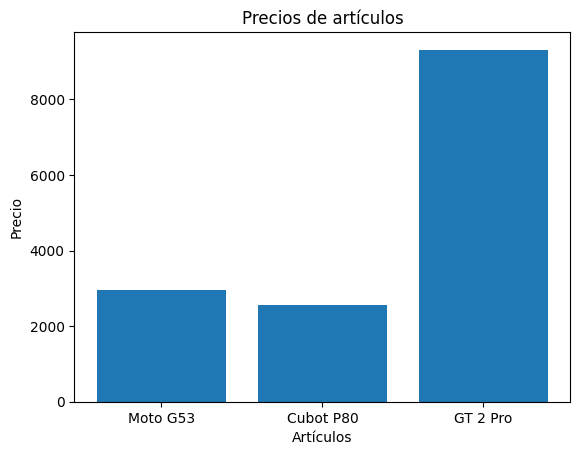

In [129]:
precios = [numero_entero, numero_entero1, numero_entero2]
articulos = ['Moto G53', 'Cubot P80', 'GT 2 Pro']

# Crear la gráfica de barras
plt.bar(articulos, precios)

# Etiquetas del eje x
plt.xlabel('Artículos')

# Etiquetas del eje y
plt.ylabel('Precio')

# Título del gráfico
plt.title('Precios de artículos')

# Mostrar el gráfico
plt.show()
